# Lec 10-12: Array Programming Paradigm
# (Iverson's Legacy)

## Iverson's Notation (APL)

Read the supplimentary Turing Lecture "Notation as Tool of Thought" where
design decision of APL is discribed. 

### from scalar to vector
~~~
iota 5   

1 2 3 4 5
~~~

### sum: from vector to scalar

~~~
+/ iota 5
15
~~~
 

### partial sum: from vector to vector

~~~
+\ iota 5
1 3 6 10 15
~~~

~~~
+/ +\ iota 5
35
~~~


### reverse:

~~~
phi iota 5
5 4 3 2 1
~~~

### repeat:

~~~
5 rho 6
5 5 5 5 5 5
~~~

~~~
5 X 6
30
~~~

This is the same as saying:

~~~
+/ 5 rho 6 <-> 6 x 5
+/ iota N <-> ( (N+1) x N ) / 2
~~~



### Reduction

* Suggestivity:
  - "A notation will be said to be suggestive if the forms of
    expressions arising in one set of problems suggest related
    expression which finds application in other problems"

* Sum can be generalized
  - *operator*: applies to an input function, produce an *derived* function
  - reduce and scan
  
    
* Applicable to any binary functions that are  associative  
  - multiply
  - and
  - or
  - min
  - max

~~~
5 rho 2
2 2 2 2 2
*/ 5 rho 2
32
~~~

[NOTE]
power is to times what times is to add!

~~~
5 rho 1
1 1 1 1 1
+\ 5 rho 1
1 2 3 4 5
~~~

~~~
iota 5
1 2 3 4 5
*/ iota 5
120
~~~

Google re-discovered map-reduce paradigm and rest if history.

### Reduction/Scan In Python

Now let's look at the same thing in Numpy. Recall Numpy package supplies a set of
*Universal Functions*, or ufunc, we have previously seen that they can be directly 
applied on an array (unary), or a pair of arrays (binary), and perform the *Elementwise*
functions. We now see that for each binary ufunc, as long as they are *associative*, that is,
ufunc( ufunc(a,b), c) = ufunc( a, ufunc(b,c) ), we can use .reduce() and .accumulate() function, to serve as the equivalent of APL / (reduce) and \(scan).

~~~
ufunc.reduce(array, axis=0, dtype=None, out=None, keepdims=False, initial=<no value>, where=True)
Reduces array’s dimension by one, by applying ufunc along one axis.

For a one-dimensional array, reduce produces results equivalent to:

r = op.identity # op = ufunc
for i in range(len(A)):
  r = op(r, A[i])
return r
~~~



In [ ]:
np.add.reduce(a)       # that's 0+1+2+3+4

In [ ]:
import numpy as np

a = np.arange( 5 )     # Remember iota? 
a

In [ ]:
a = np.array( [1]*10 )
np.add.accumulate( a ) #what do you expect?

In [ ]:
np.add.reduce(a)

In [ ]:
np.add.accumulate(a)   #what opereator in APL ? 

### Innder Product: Map-Reduce on (*,+)

* If P and Q are two vectors, then inner product + . x is

~~~
 P +.x Q <-> +/ P x Q
~~~
 
    - pairwise multiplication produce intermediate vector
    - reduction over intermediate vector produce a scalar

~~~
P <- 2 3 5
Q <- 2 1 2
P +.x Q
17
~~~

* Generalize: Applicable to any functions   


~~~
P x.* Q
300
P min.+ Q
4
~~~

### Matrix Multiplication:

Isn't it just applying inner product for each (row, col) combination?
A @ B in Numpy notation.


### Why Map Reduce 

So far we have seen the application of "operators", that
is functions on functions, in particular, the reduce operator.
We have seen how "general" they are in the sense that they
identify a "pattern" of computation applicable to many scenarios,
on different data types, on different functions. But why bother? 
Is it just for aestheticm or taste? Are there real world implications?

The answer is that map-reduce pattern is NOT ONLY general and applicable
to many real world problems, it can also be run VERY FAST! In fact,
the big data analysis industry with the Hadoop framework, was effectively
born after Google "redicovered" map-reduce in the junk yard, and it is
a multi-billion dollar industry TODAY. So What was the secret?

- First, the stage is *embarrassingly parallel*, and can be calculated as fast
as the the computational resources available;

- Second, the reduce stage, due to the associativity of the function to be reduced, 
  we can manipulate the evaluation order, and use ONLY O(logN) parallel steps to evaluate all reduce computations. 

Below is a picture of how prefix scan is performed in parallel. You can see the upper half is really calculating the scan. Watch the number of steps, in relation to the size of the problem.
The second half is like the upper going up-side down, to calculate the rest of the partial sum.

![Parallelization](Prefix_sum_16.svg.png "Prefix Scan")

So as long as you could identify a map-reduce pattern, a whole data center can run
to solve your problem mechanically. That's what Google did many years back.


## Graph Algorithms as Map Reduce

### Directed Graph Visualization

 * A set of nodes 
 * A set of directed edges


In [ ]:
%pip install graphviz

In [ ]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

dot.node( '0' )
dot.node( '1' )
dot.node( '2' )
dot.node( '3' )
dot.edges( ['13', '20', '30'])
dot

### Matrix Representation

Connection Matrix (Ajacency Matrix): 

N by N matrix, where N is the number of nodes,
defines the set of edges:
each entry A[i,j], corresponds to an edge from
node i to node j. Type of entry can either be True of False,
representing just the topology, or a number representation
the *weight* of an edge.

In [ ]:
A = np.array( [ [0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0] ] )
A

Let's write a tool to visualize our graph.

In [ ]:
def draw_graph( m ) :
    dot = Digraph()
    for i in range(m.shape[0]) :
        dot.node( str(i) )
    for i in range(m.shape[0]) :
        for j in range(m.shape[1]) :
            if m[i,j] > 0 :
                dot.edge( str(i), str(j) )
    return dot

draw_graph( A )

* What is the in degree of every node? (# edges comming into the node)

In [ ]:
np.add.reduce( A )

* What is the out degree of every node? (# edges going out of node)

In [ ]:
np.add.reduce( A, axis=1 )

* What is the total number of edges in the entire graph?

In [ ]:
np.add.reduce( np.add.reduce(A) )

* What is the related graph of A with all edge direction reversed?

In [ ]:
B = np.transpose( A )
draw_graph( B )

* What is the set of immediately reachabile neighbor? 

In [ ]:
print( A )
draw_graph(A)

* What is the set of reachabile neighbors by two hops? 

In [ ]:
A @ A       # Matrix Multiply (Squaring) !

In [ ]:
draw_graph( A@A )

* What is the set of reachabile neighbors by one AND two hops?

In [ ]:
draw_graph( np.logical_or( A, A@A ) )

* What is the reachabile set of ALL nodes?

In [ ]:
def reachable( m ) :
    set = m
    frontier = m
    while True :
        frontier = frontier @ m
        new = np.logical_or( set, frontier )
        if np.array_equal(new,set) :
            return set
        set = new

In [ ]:
C = reachable( A )
draw_graph( C )

We have just seen Matrix Multiply on (0,1) matrices, with effectively the mathematical field of AND (for multiply) and OR (for add). Pattern is the same of numeracal MUTLIPLIER and ADD we used to in linear algebra. What about SUM/MIN? What problem can we use to solve? 

In [ ]:
A Challenge: How about the shortest path algorithm?

## Conway Game of Life

Conway’s Game of Life is a *cellular automaton* devised by the British mathematician John Horton Conway in 1970. It’s a zero-player game, meaning its evolution is determined by its initial state, requiring no further input.

Conway’s Game of Life follows these simple rules:
1. a cell survives if it has 2 or 3 living neighbors.
2. a cell dies of loneliness if it has fewer than 2 living neighbors or of overpopulation if it has more than 3 living neighbors.
3. a dead cell is reborn if it is surrounded by exactly 3 living neighbors.


We will be simulating the the world by a 2-dimensional grid.
The simulated world is initialized randomly, and it will just evolves by the simply rules above.

We maybe living a simulated world, who knows!

Let's see if you are the god of Conway's Game of Life, how you would program it.
Again, the rule is: NO (or less really) loops.

Let's first DEFINE the universe.

In [2]:
import numpy as np
N = 100 # Grid size
ON = 255 # Cell ON state
OFF = 0 # Cell OFF state

# universe = np.random.choice( [ON,OFF], N*N, p = [0.2,0.8]).reshape( N,N )

Let's simulate the universe.

In [3]:
def simulate( universe ):
    new = universe.copy()
    for i in range( N ) :
        for j in range( N ) :
            new[i,j] = np.random.choice( [ON,OFF], 1 )[0]
    universe[:] = new[:]
    return new

Let's visualize the universe

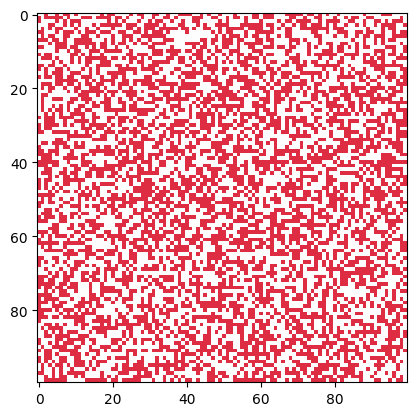

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def shade(universe):
    color = np.zeros((universe.shape[0], universe.shape[1], 3), dtype=np.uint8)
    color[universe == ON] = np.array([222, 45, 67])
    color[universe == OFF] = np.array([253, 253, 254])
    return color

def animate( frameNum, img, grid ) :
    img.set_data( shade(simulate(grid)) )

def animate_universe() : 
    universe = np.random.choice( [ON,OFF], N*N, p = [0.2,0.8]).reshape( N,N )
    fig, ax = plt.subplots()
    img = ax.imshow( shade(universe), interpolation='nearest' )
    ani = animation.FuncAnimation( fig, animate, fargs=(img,universe,),frames=10,interval=60)
    return ani

# this is to embed animation object inside Jupyter
from IPython.display import HTML

HTML( animate_universe().to_jshtml() )

Apparently, This is a dead universe with INFINITE entropy as everything borns and dies randomly. Let's define the RULE of the universe according to Conway Game of Life.

In [7]:
def simulate( u ):
    new = u.copy()
    for a in range( N ) :
        for b in range( N ) :
            total = int((u[a,(b-1)%N]+
                         u[a,(b+1)%N]+
                         u[(a-1)%N,b]+
                         u[(a+1)%N,b]+
                         u[(a-1)%N,(b-1)%N]+
                         u[(a-1)%N,(b+1)%N]+
                         u[(a+1)%N,(b-1)%N]+
                         u[(a+1)%N,(b+1)%N])/255)
            if u[a, b] == ON:
                if (total < 2) or (total > 3):
                    new[a,b] = OFF
            else:
                if total == 3:
                    new[a,b] = ON
    u[:] = new[:]
    return new

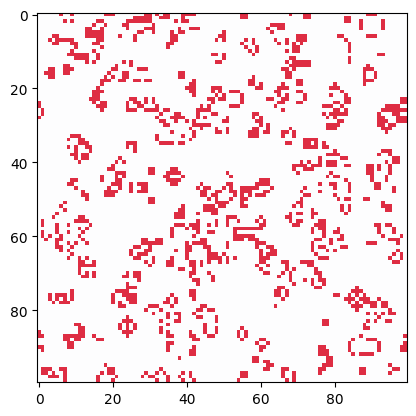

In [8]:
HTML( animate_universe().to_jshtml() )

This is a lot more interesting. But wait, we haven't yet met our challenge!

How can I refer to my left neighbor COLLECTIVELY?

In [9]:
x = np.array( [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]] )
np.roll(x,1, axis=1)

array([[ 2,  0,  1],
       [ 5,  3,  4],
       [ 8,  6,  7],
       [11,  9, 10]])

How can I refer to my upper neighbor COLLECTIVELY?

In [10]:
x = np.array( [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]] )
np.roll(x,1, axis=0)

array([[ 9, 10, 11],
       [ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8]])

In [ ]:
How can I refer to my left-upper diagnal neighbor COLLECTIVELY?

x = np.array( [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]] )
np.roll( np.roll(x,1, axis=0), 1, axis=1 )

In [11]:
x = np.array( [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]] )
np.roll( np.roll(x,1, axis=0), 1, axis=1 )

array([[11,  9, 10],
       [ 2,  0,  1],
       [ 5,  3,  4],
       [ 8,  6,  7]])

So let's roll! (PUN intended)

In [12]:
def roll( u, a0, a1 ) :
    u = u if a0 == 0 else np.roll(u,a0,axis=0)
    u = u if a1 == 0 else np.roll(u,a1,axis=1)
    # np.roll can shift multiple axis simultaneously
    # so you could simply do: return np.roll(u,(a0,a1))
    return u
    
def simulate( u ):
    # get rid of loops, use ONE expression!
    total = roll(u,1,0) + roll(u,-1,0) +  \
            roll(u,1,1) + roll(u,-1,1) +  \
            roll(u,-1,1) + roll(u,-1,-1) + \
            roll(u,1,1) + roll(u,1,-1)
    total = total / 255
    cond1 = np.logical_and( u == ON, np.logical_or( total < 2, total > 3 ) )
    cond2 = np.logical_and( u == OFF, total == 3 )
    u[cond1] = OFF
    u[cond2] = ON
    return u

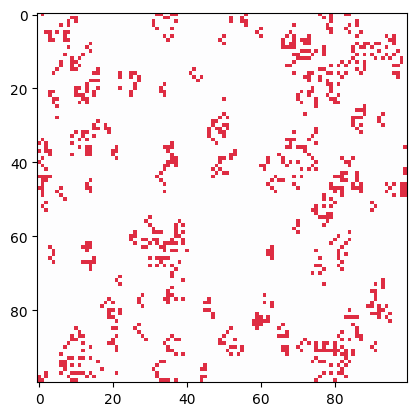

In [13]:
HTML( animate_universe().to_jshtml() )

Let's reflect our journey:

1. We can SIMULATE a world by defining its state and state evolution;
2. Evolution is defined as a function that maps old state to new state;
3. The world state is represented by an N-D array;
4. We should consider the new state as a WHOLE instead of imperatively compute each element;
5. Loop & Subscripts can be eliminated!

In [ ]:
  For fun, this is the original Conway Game of Life APL Code:

life ← {⊃1 ⍵ ∨.∧ 3 4 = +/ +⌿ ¯1 0 1 ∘.⊖ ¯1 0 1 ⌽¨ ⊂⍵}